<a href="https://colab.research.google.com/github/jonimccawley/OpenCV-Workshop/blob/main/Image_processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Simple image processing algorithm

In [56]:
# Import OpenCV
import cv2

# need this library only foor google colab, normally use cv2.imshow(image)
from google.colab.patches import cv2_imshow

# NumPy for efficient array operations
# Matplotlib for image Visualization
import numpy as np
import matplotlib.pyplot as plt

# Load in image

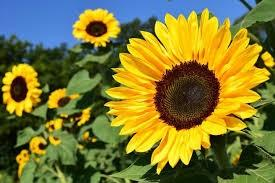

In [57]:
# Load image from file path
image = cv2.imread('sunflowers.jpg')

# Display the loaded image in the Colab environment
cv2_imshow(image)

# Yellow color segmentation

  Note: we conver to hsv (hue, saturation, value) color space because it is more robust to variations in lighting conditions compared to other color spaces.

  Hue: The hue value represents the color type. Values range from 0 to 179 in OpenCV.

  Saturation: The saturation value represents the color intensity. Values ranges from 0 to 255.

  Value: The value represents the brightness of the color. Values range from 0 to 255.

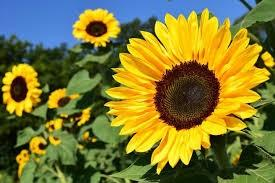

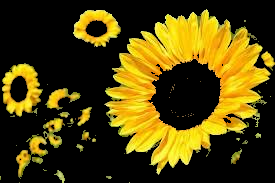

In [58]:
# Convert the image to the HSV color space
hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# HSV (Hue, Saturation, Value) color space
# Define the lower and upper bounds for the yellow color in HSV
lower_yellow = np.array([17, 90, 100])
upper_yellow = np.array([35, 255, 255])

# lower_yellow = np.array([15, 80, 90])
# upper_yellow = np.array([35, 255, 255])

# Create a mask to extract the yellow color
yellow_mask = cv2.inRange(hsv_image, lower_yellow, upper_yellow)

# Bitwise-AND the original image and the mask to extract the yellow
yellow_segmented = cv2.bitwise_and(image, image, mask=yellow_mask)

# Display the original image and the extracted yellow color
cv2_imshow(image)
cv2_imshow(yellow_segmented)
cv2.waitKey(0)
cv2.destroyAllWindows()


# Bitwise function to combine mask

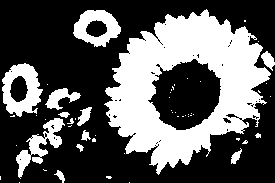

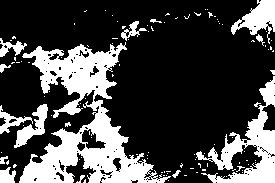

In [59]:
# Define the HSV range for green
lower_green = np.array([35, 70, 40])
upper_green = np.array([85, 255, 255])

# Create masks for yellow and brown
yellow_mask = cv2.inRange(hsv_image, lower_yellow, upper_yellow)
green_mask = cv2.inRange(hsv_image, lower_green, upper_green)

# Display the result
cv2_imshow(yellow_mask)
cv2_imshow(green_mask)
cv2.waitKey(0)
cv2.destroyAllWindows()

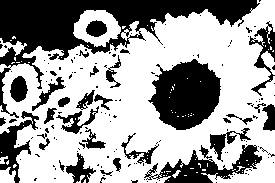

In [60]:
# Combine the two masks
combined_mask = cv2.bitwise_or(yellow_mask, green_mask)

cv2_imshow(combined_mask)
cv2.waitKey(0)
cv2.destroyAllWindows()

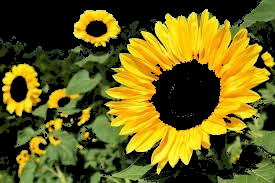

In [61]:
# Apply the masks to segment out the colors
yellow_green_segmented = cv2.bitwise_and(image, image, mask=combined_mask)

# Display the result
cv2_imshow(yellow_green_segmented)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Overlaying images

Here we will blur the background of the image while leaving the yellow petals clear

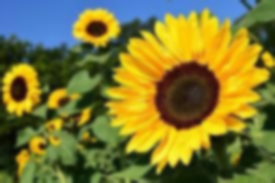

In [72]:
# Apply Gaussian blur
# The second parameter is the kernel size - you can adjust this based on your requirements
# The third parameter (0) is the standard deviation in X and Y. If it's zero, it's calculated from the kernel size
blurred_image = cv2.GaussianBlur(image, (9, 9), 0)

# Save the blurred image
cv2.imwrite('blurred_image.jpg', blurred_image)

# Optionally, display the result
cv2_imshow(blurred_image)
cv2.waitKey(0)
cv2.destroyAllWindows()


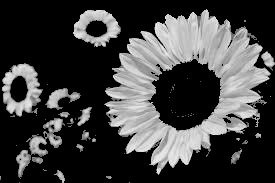

-1

In [63]:
image_segmented = yellow_segmented.copy()

# Convert image to grayscale using the cv2.cvtColor function
gray_segmented = cv2.cvtColor(image_segmented, cv2.COLOR_BGR2GRAY)

# Show the image
cv2_imshow(gray_segmented)
cv2.waitKey(0)

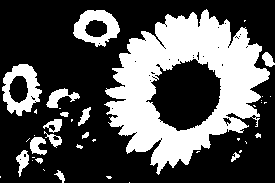

-1

In [64]:
# Convert the grayscale segmented image to binary mask

# Pixels with intensity values less than 127 are set to black
# Pixels with intensity values greater than or equal to 127 are set to white.
_, binary_mask = cv2.threshold(gray_segmented, 127, 255, cv2.THRESH_BINARY)

# Show the image
cv2_imshow(binary_mask)
cv2.waitKey(0)

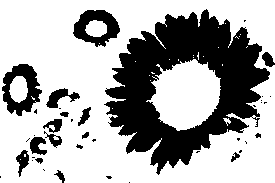

-1

In [65]:
# Create an inverse binary mask
# This will be used to isolate the blurred parts of the image
inverse_binary_mask = cv2.bitwise_not(binary_mask)

# Show the resultant image
cv2_imshow(inverse_binary_mask)
cv2.waitKey(0)

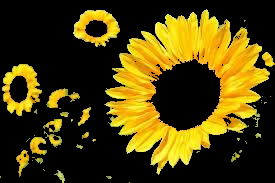

-1

In [66]:
# Use the binary mask to take the non-blurred parts from the original image
# This line extracts the non-blurred part from the original image using the binary_mask
non_blurred_part = cv2.bitwise_and(image, image_segmented, mask=binary_mask)

# Show the resultant image
cv2_imshow(non_blurred_part)
cv2.waitKey(0)

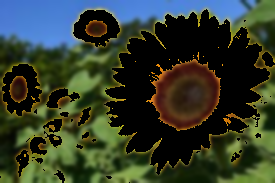

-1

In [67]:
# Use the inverse binary mask to take the blurred parts
blurred_part = cv2.bitwise_and(blurred_image, blurred_image, mask=inverse_binary_mask)

# Show the resultant image
cv2_imshow(blurred_part)
cv2.waitKey(0)

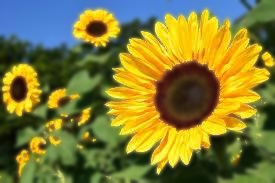

In [68]:
# Combine the non-blurred and blurred parts to create the resultant image
resultant_img = cv2.add(non_blurred_part, blurred_part)

# Save the resultant image
cv2.imwrite('resultant.jpg', resultant_img)

# Show the resultant image
cv2_imshow(resultant_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Turn yellow pixels pink

1. We will use the indices found in the previous yellow segmentation step to index into pink_image and replace the color values of the yellow pixels with a new color
2. np.where(yellow_mask > 0) finds the locations of all yellow pixels in the image.

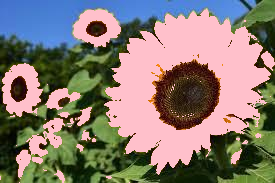

In [69]:
pink_image = image.copy()

# Replace the yellow pixels with pink
pink_image[np.where(yellow_mask > 0)] = [203, 192, 255]

# Display the modified image with yellow turned to pink
# cv.imshow('Modified Image', image)
cv2_imshow(pink_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Stylized effect

K-means clustering for color reduction

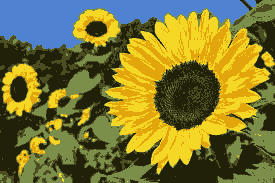

In [74]:
# Reshape the image data into a 2D array
pixels = image.reshape((-1, 3))

# Convert to floating point for more accurate arithmetic during k-means clustering algorithm
pixels = np.float32(pixels)

# Define criteria and apply kmeans()
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
k = 6
_, labels, centers = cv2.kmeans(pixels, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

# Convert centers back to 8-bit values (standard format for image data)
centers = np.uint8(centers)

# Each pixel is colored according to the center of the cluster it belongs to
segmented_image = centers[labels.flatten()]

# The segmented image data is reshaped back to the original image dimensions
segmented_image = segmented_image.reshape(image.shape)

# Display the result
cv2_imshow(segmented_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

For more functions and tutorials: https://docs.opencv.org/4.x/d9/df8/tutorial_root.html